In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.datasets import cifar10

# CIFAR-10 데이터셋 로드 및 정규화
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# 모델 구성
model = Sequential([
    Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), padding='same', activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(128, (3, 3), padding='same', activation='relu'),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# SGD 최적화 알고리즘 설정: 모멘텀 추가
optimizer = SGD(learning_rate=0.01, momentum=0.9)

# 모델 컴파일
model.compile(
    optimizer=optimizer,
    loss=SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

# Early Stopping 콜백 설정
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    verbose=1,
    restore_best_weights=True
)

# 모델 훈련 및 검증 데이터와 함께 실행
history = model.fit(
    x_train, y_train,
    batch_size=64,
    epochs=30,
    validation_data=(x_test, y_test),
    callbacks=[early_stopping]
)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 16s 12ms/step - accuracy: 0.1680 - loss: 2.1916 - val_accuracy: 0.3379 - val_loss: 1.7330
Epoch 2/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3625 - loss: 1.7112 - val_accuracy: 0.4527 - val_loss: 1.5583
Epoch 3/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4713 - loss: 1.4595 - val_accuracy: 0.5487 - val_loss: 1.2478
Epoch 4/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5426 - loss: 1.2861 - val_accuracy: 0.6091 - val_loss: 1.1115
Epoch 5/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5852 - loss: 1.1669 - val_accuracy: 0.6230 - val_loss: 1.0609
Epoch 6/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6235 - loss: 1.0679 - val_accuracy: 0.6722 - val_loss: 0.9332
Epoch 7/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6520 - loss: 0.9959 - val_accuracy: 0.6826 - val_loss: 0.8877
Epoch 8/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6763 - loss: 0.9253 - val_accuracy: 

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.datasets import cifar10

# CIFAR-10 데이터셋 로드
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# 데이터 증강을 위한 설정
train_datagen = ImageDataGenerator(
    rescale=1./255,  # 픽셀 값을 0~1 범위로 조정
    rotation_range=15,  # 15도 내외로 무작위로 회전
    width_shift_range=0.1,  # 10% 내외로 수평 이동
    height_shift_range=0.1,  # 10% 내외로 수직 이동
    horizontal_flip=True,  # 수평 뒤집기 적용
    fill_mode='nearest'
)

# 테스트 데이터를 위한 ImageDataGenerator (증강 없이 단순 정규화만 수행)
test_datagen = ImageDataGenerator(rescale=1./255)

# 모델 구성
model = Sequential([
    Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), padding='same', activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(128, (3, 3), padding='same', activation='relu'),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# SGD 최적화 알고리즘 설정: 모멘텀 추가
optimizer = SGD(learning_rate=0.01, momentum=0.9)

# 모델 컴파일
model.compile(
    optimizer=optimizer,
    loss=SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

# Early Stopping 콜백 설정
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    verbose=1,
    restore_best_weights=True
)

# 모델 훈련 및 검증 데이터와 함께 실행
history = model.fit(
    train_datagen.flow(x_train, y_train, batch_size=64),
    epochs=30,
    validation_data=test_datagen.flow(x_test, y_test),
    callbacks=[early_stopping]
)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 46ms/step - accuracy: 0.1615 - loss: 2.2036 - val_accuracy: 0.3315 - val_loss: 1.8474
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.3143 - loss: 1.8415 - val_accuracy: 0.4510 - val_loss: 1.4869
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.3966 - loss: 1.6196 - val_accuracy: 0.5031 - val_loss: 1.3422
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.4682 - loss: 1.4662 - val_accuracy: 0.5716 - val_loss: 1.1859
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.5106 - loss: 1.3658 - val_accuracy: 0.5802 - val_loss: 1.1675
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.5430 - loss: 1.2725 - val_accuracy: 0.6277 - val_loss: 1.0407
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.5707 - loss: 1.2002 - val_accuracy: 0.6437 - val_loss: 0.9943
Epoch 8/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.5946 - loss: 1.1466 - 

In [2]:
import matplotlib.pyplot as plt
# 훈련 및 검증 손실 그래프
plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 훈련 및 검증 정확도 그래프
plt.figure(figsize=(8, 4))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

NameError: name 'history' is not defined

<Figure size 800x400 with 0 Axes>

In [3]:
!pip install tensorflow

Test 6
- 성능은 좋아짐, 하지만 batch nomalization, 하이퍼 파라미터 튜닝을 통해 성능을 더 올려보고자 함.

- epoch은 줄일 필요 있어보임

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.datasets import cifar10

# CIFAR-10 데이터셋 로드
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# 데이터 증강을 위한 설정
train_datagen = ImageDataGenerator(
    rescale=1./255,  # 픽셀 값을 0~1 범위로 조정
    rotation_range=15,  # 15도 내외로 무작위로 회전
    width_shift_range=0.1,  # 10% 내외로 수평 이동
    height_shift_range=0.1,  # 10% 내외로 수직 이동
    horizontal_flip=True,  # 수평 뒤집기 적용
    fill_mode='nearest'
)

# 테스트 데이터를 위한 ImageDataGenerator (증강 없이 단순 정규화만 수행)
test_datagen = ImageDataGenerator(rescale=1./255)

# 모델 구성
model = Sequential([
    Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), padding='same', activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(128, (3, 3), padding='same', activation='relu'),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# SGD 최적화 알고리즘 설정: 모멘텀 추가
optimizer = SGD(learning_rate=0.01, momentum=0.9)

# 모델 컴파일
model.compile(
    optimizer=optimizer,
    loss=SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

# Early Stopping 콜백 설정
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    verbose=1,
    restore_best_weights=True
)

# 모델 훈련 및 검증 데이터와 함께 실행
history = model.fit(
    train_datagen.flow(x_train, y_train, batch_size=64),
    epochs=30,
    validation_data=test_datagen.flow(x_test, y_test),
    callbacks=[early_stopping]
)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 46s 49ms/step - accuracy: 0.1617 - loss: 2.2055 - val_accuracy: 0.3261 - val_loss: 1.8099
Epoch 2/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 41ms/step - accuracy: 0.3151 - loss: 1.8306 - val_accuracy: 0.4322 - val_loss: 1.5273
Epoch 3/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.4083 - loss: 1.5999 - val_accuracy: 0.4989 - val_loss: 1.3643
Epoch 4/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.4687 - loss: 1.4534 - val_accuracy: 0.5859 - val_loss: 1.1468
Epoch 5/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.5161 - loss: 1.3406 - val_accuracy: 0.5820 - val_loss: 1.1584
Epoch 6/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.5470 - loss: 1.2688 - val_accuracy: 0.6315 - val_loss: 1.0299
Epoch 7/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.5770 - loss: 1.1870 - val_accuracy: 0.6342 - val_loss: 1.0236
Epoch 8/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 42ms/step - accuracy: 0.5979 - loss: 1.1387 - val_accurac

KeyboardInterrupt: 

In [6]:
!pip install tensorflow.keras.wrappers.scikit_learn

ERROR: Could not find a version that satisfies the requirement tensorflow.keras.wrappers.scikit_learn (from versions: none)
ERROR: No matching distribution found for tensorflow.keras.wrappers.scikit_learn


In [10]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.losses import SparseCategoricalCrossentropy

# CIFAR-10 데이터셋 로드
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# 모델 빌드 함수
def build_model(learning_rate, dropout_rate):
    model = Sequential([
        Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3)),
        BatchNormalization(),
        tf.keras.layers.ReLU(),
        Conv2D(32, (3, 3)),
        BatchNormalization(),
        tf.keras.layers.ReLU(),
        MaxPooling2D((2, 2)),
        Dropout(dropout_rate),

        Conv2D(64, (3, 3), padding='same'),
        BatchNormalization(),
        tf.keras.layers.ReLU(),
        Conv2D(64, (3, 3)),
        BatchNormalization(),
        tf.keras.layers.ReLU(),
        MaxPooling2D((2, 2)),
        Dropout(dropout_rate),

        Conv2D(128, (3, 3), padding='same'),
        BatchNormalization(),
        tf.keras.layers.ReLU(),
        Conv2D(128, (3, 3)),
        BatchNormalization(),
        tf.keras.layers.ReLU(),
        MaxPooling2D((2, 2)),
        Dropout(dropout_rate),

        Flatten(),
        Dense(256),
        BatchNormalization(),
        tf.keras.layers.ReLU(),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])
    optimizer = SGD(learning_rate=learning_rate, momentum=0.9)
    model.compile(
        optimizer=optimizer,
        loss=SparseCategoricalCrossentropy(),
        metrics=['accuracy']
    )
    return model

# 하이퍼파라미터 튜닝
learning_rates = [0.01, 0.001]
dropout_rates = [0.25, 0.4]
batch_sizes = [32, 64]
epochs = 10  # 테스트 목적

best_params = None
best_val_accuracy = 0

# 하이퍼파라미터 탐색
for lr in learning_rates:
    for dr in dropout_rates:
        for batch_size in batch_sizes:
            print(f"Testing params: learning_rate={lr}, dropout_rate={dr}, batch_size={batch_size}")
            model = build_model(lr, dr)

            early_stopping = EarlyStopping(
                monitor='val_loss',
                patience=5,
                verbose=0,
                restore_best_weights=True
            )

            history = model.fit(
                x_train, y_train,
                batch_size=batch_size,
                epochs=epochs,
                validation_split=0.2,
                callbacks=[early_stopping],
                verbose=0
            )

            val_accuracy = max(history.history['val_accuracy'])
            if val_accuracy > best_val_accuracy:
                best_val_accuracy = val_accuracy
                best_params = {'learning_rate': lr, 'dropout_rate': dr, 'batch_size': batch_size}

# 최적의 하이퍼파라미터 출력
print(f"Best params: {best_params}, Best validation accuracy: {best_val_accuracy:.4f}")



Testing params: learning_rate=0.01, dropout_rate=0.25, batch_size=32


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Testing params: learning_rate=0.01, dropout_rate=0.25, batch_size=64
Testing params: learning_rate=0.01, dropout_rate=0.4, batch_size=32
Testing params: learning_rate=0.01, dropout_rate=0.4, batch_size=64
Testing params: learning_rate=0.001, dropout_rate=0.25, batch_size=32
Testing params: learning_rate=0.001, dropout_rate=0.25, batch_size=64
Testing params: learning_rate=0.001, dropout_rate=0.4, batch_size=32
Testing params: learning_rate=0.001, dropout_rate=0.4, batch_size=64
Best params: {'learning_rate': 0.01, 'dropout_rate': 0.25, 'batch_size': 32}, Best validation accuracy: 0.7893


In [13]:
# 최적 파라미터로 최종 모델 훈련
model = build_model(best_params['learning_rate'], best_params['dropout_rate'])

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    verbose=1,
    restore_best_weights=True
)

history = model.fit(
    x_train, y_train,
    batch_size=best_params['batch_size'],
    epochs=100,
    validation_data=(x_test, y_test),
    callbacks=[early_stopping]
)

Epoch 1/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.3303 - loss: 1.9057 - val_accuracy: 0.5545 - val_loss: 1.2183
Epoch 2/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5541 - loss: 1.2462 - val_accuracy: 0.6085 - val_loss: 1.0945
Epoch 3/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6378 - loss: 1.0234 - val_accuracy: 0.6588 - val_loss: 0.9510
Epoch 4/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6888 - loss: 0.8956 - val_accuracy: 0.7347 - val_loss: 0.7583
Epoch 5/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7142 - loss: 0.8212 - val_accuracy: 0.7377 - val_loss: 0.7566
Epoch 6/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7329 - loss: 0.7656 - val_accuracy: 0.7118 - val_loss: 0.8659
Epoch 7/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7489 - loss: 0.7206 - val_accuracy: 0.7633 - val_loss: 0.6786
Epoch 8/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7678 - loss: 

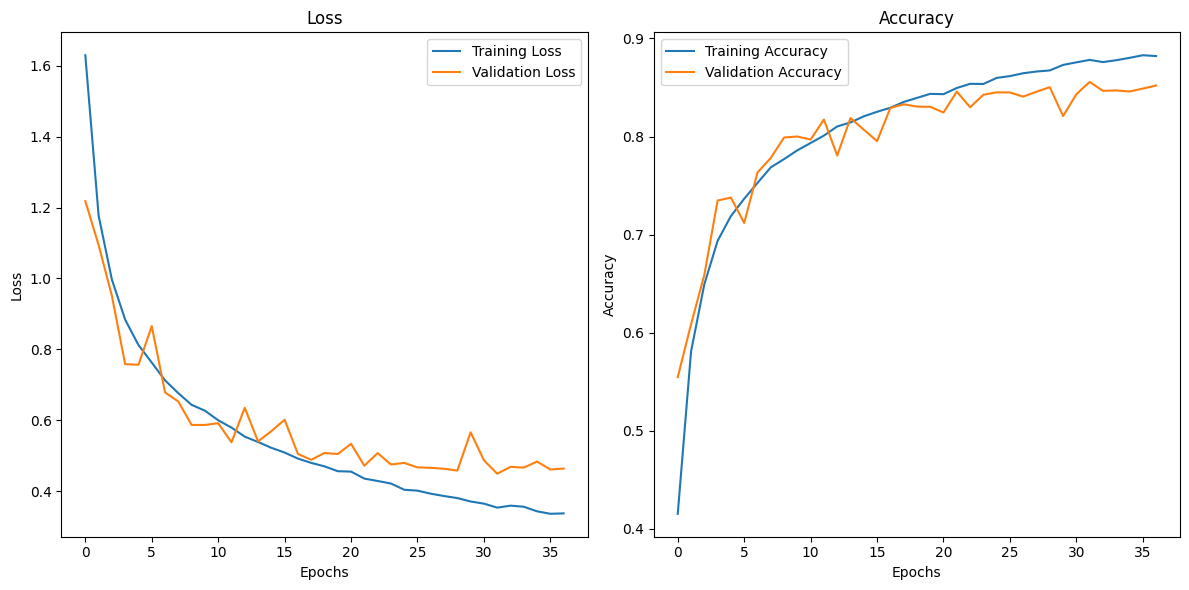

In [14]:

# 결과 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Loss 그래프
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy 그래프
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


Test7
- 확실히 성능이 정확도 85퍼까지 상승했으나, 더 많은 에폭에 대한 학습을 보기 위해 Early stopping의 기능을 완화 하고자 함


Test 8
- early stopping 변수 중 patience를 10으로 늘리면서 일단 베스트 파라미터 튜닝에서는 크게 작동할것 같지는 않지만 , 에폭을 100으로 했을때의 평가데이터에 대한 성능을 평가하고자 함

In [18]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.losses import SparseCategoricalCrossentropy

# CIFAR-10 데이터셋 로드
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# 모델 빌드 함수
def build_model(learning_rate, dropout_rate):
    model = Sequential([
        Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3)),
        BatchNormalization(),
        tf.keras.layers.ReLU(),
        Conv2D(32, (3, 3)),
        BatchNormalization(),
        tf.keras.layers.ReLU(),
        MaxPooling2D((2, 2)),
        Dropout(dropout_rate),

        Conv2D(64, (3, 3), padding='same'),
        BatchNormalization(),
        tf.keras.layers.ReLU(),
        Conv2D(64, (3, 3)),
        BatchNormalization(),
        tf.keras.layers.ReLU(),
        MaxPooling2D((2, 2)),
        Dropout(dropout_rate),

        Conv2D(128, (3, 3), padding='same'),
        BatchNormalization(),
        tf.keras.layers.ReLU(),
        Conv2D(128, (3, 3)),
        BatchNormalization(),
        tf.keras.layers.ReLU(),
        MaxPooling2D((2, 2)),
        Dropout(dropout_rate),

        Flatten(),
        Dense(256),
        BatchNormalization(),
        tf.keras.layers.ReLU(),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])
    optimizer = SGD(learning_rate=learning_rate, momentum=0.9)
    model.compile(
        optimizer=optimizer,
        loss=SparseCategoricalCrossentropy(),
        metrics=['accuracy']
    )
    return model

# 하이퍼파라미터 튜닝
learning_rates = [0.01, 0.001 ,0.005]
dropout_rates = [0.25, 0.4]
batch_sizes = [32, 64, 128, 256]
epochs = 10  # 테스트 목적

best_params = None
best_val_accuracy = 0

# 하이퍼파라미터 탐색
for lr in learning_rates:
    for dr in dropout_rates:
        for batch_size in batch_sizes:
            print(f"Testing params: learning_rate={lr}, dropout_rate={dr}, batch_size={batch_size}")
            model = build_model(lr, dr)

            early_stopping = EarlyStopping(
                monitor='val_loss',
                patience=5,
                verbose=0,
                restore_best_weights=True
            )

            history = model.fit(
                x_train, y_train,
                batch_size=batch_size,
                epochs=epochs,
                validation_split=0.2,
                callbacks=[early_stopping],
                verbose=0
            )

            val_accuracy = max(history.history['val_accuracy'])
            if val_accuracy > best_val_accuracy:
                best_val_accuracy = val_accuracy
                best_params = {'learning_rate': lr, 'dropout_rate': dr, 'batch_size': batch_size}

# 최적의 하이퍼파라미터 출력
print(f"Best params: {best_params}, Best validation accuracy: {best_val_accuracy:.4f}")



Testing params: learning_rate=0.01, dropout_rate=0.25, batch_size=32


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Testing params: learning_rate=0.01, dropout_rate=0.25, batch_size=64
Testing params: learning_rate=0.01, dropout_rate=0.25, batch_size=128
Testing params: learning_rate=0.01, dropout_rate=0.25, batch_size=256
Testing params: learning_rate=0.01, dropout_rate=0.4, batch_size=32
Testing params: learning_rate=0.01, dropout_rate=0.4, batch_size=64
Testing params: learning_rate=0.01, dropout_rate=0.4, batch_size=128
Testing params: learning_rate=0.01, dropout_rate=0.4, batch_size=256
Testing params: learning_rate=0.001, dropout_rate=0.25, batch_size=32
Testing params: learning_rate=0.001, dropout_rate=0.25, batch_size=64
Testing params: learning_rate=0.001, dropout_rate=0.25, batch_size=128
Testing params: learning_rate=0.001, dropout_rate=0.25, batch_size=256
Testing params: learning_rate=0.001, dropout_rate=0.4, batch_size=32
Testing params: learning_rate=0.001, dropout_rate=0.4, batch_size=64
Testing params: learning_rate=0.001, dropout_rate=0.4, batch_size=128
Testing params: learning_ra

In [19]:
# 최적 파라미터로 최종 모델 훈련
model = build_model(best_params['learning_rate'], best_params['dropout_rate'])

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=15,
    verbose=1,
    restore_best_weights=True
)

history = model.fit(
    x_train, y_train,
    batch_size=best_params['batch_size'],
    epochs=300,
    validation_data=(x_test, y_test),
    callbacks=[early_stopping]
)

Epoch 1/300
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.3403 - loss: 1.8699 - val_accuracy: 0.4991 - val_loss: 1.4623
Epoch 2/300
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5683 - loss: 1.2047 - val_accuracy: 0.6710 - val_loss: 0.9233
Epoch 3/300
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6543 - loss: 0.9917 - val_accuracy: 0.6401 - val_loss: 1.0748
Epoch 4/300
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6939 - loss: 0.8748 - val_accuracy: 0.7344 - val_loss: 0.7702
Epoch 5/300
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7263 - loss: 0.7965 - val_accuracy: 0.7360 - val_loss: 0.7509
Epoch 6/300
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7443 - loss: 0.7422 - val_accuracy: 0.7408 - val_loss: 0.7393
Epoch 7/300
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7615 - loss: 0.6998 - val_accuracy: 0.7554 - val_loss: 0.7295
Epoch 8/300
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7748 - loss: 

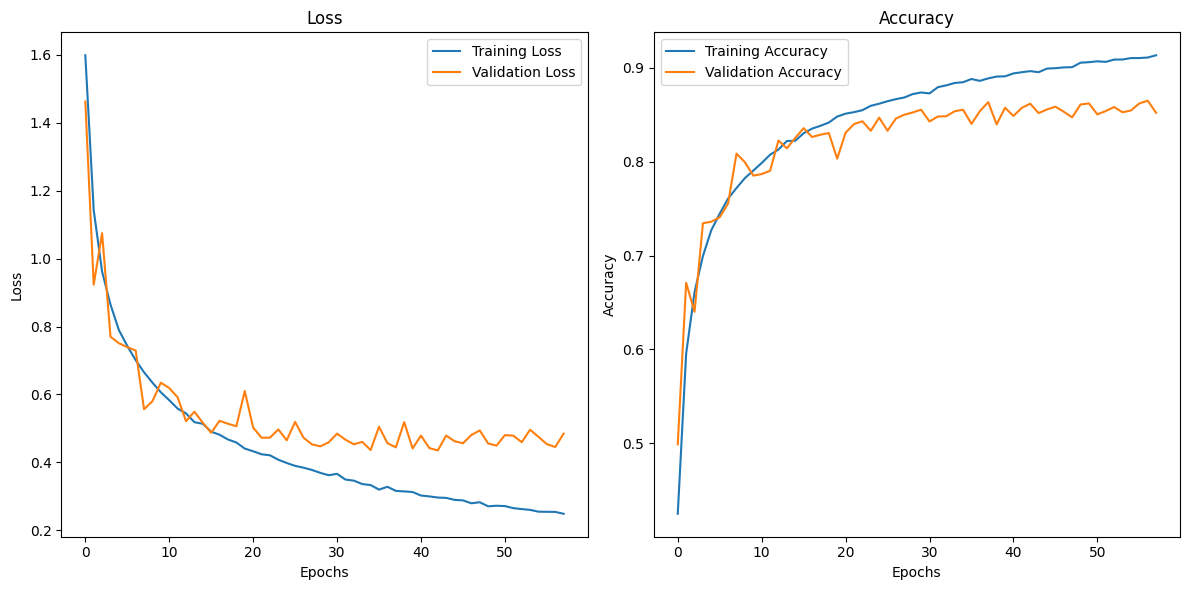

In [20]:

# 결과 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Loss 그래프
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy 그래프
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()
